In [1]:
import os
import datetime
# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import albumentations as A

# visualization
import wandb
import dataset_ae
import model
# visualization
import wandb

from importlib import import_module
from tqdm.auto import tqdm

import time
from pytz import timezone

/home/supergalaxy/miniconda/envs/junha_tf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
input_size = 1024
code_size = 100
batch_size = 8
LR = 0.001
seed = 0
max_epoch = 300

In [3]:
def wandb_config():
    wandb.init(config={'batch_size':batch_size,
                    'learning_rate':LR,                 #차차 args.~~로 update할 것
                    'seed':seed,
                    'max_epoch':max_epoch},
            project='Segmentation',
            entity='aivengers_seg',
            name=f"AE_MSE_tf={input_size}_cln=True_e={max_epoch}_sd={seed}"
            )

In [4]:
def make_dataset(input_size = 1024):
    # dataset load
    tf = A.Resize(input_size, input_size)
    
    train_dataset = dataset_ae.AEDataset(transforms=tf)
    valid_dataset = dataset_ae.AEDataset(transforms=tf)
        

    train_loader = DataLoader(
        dataset=train_dataset, 
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        drop_last=True,
    )
    valid_loader = DataLoader(
        dataset=valid_dataset, 
        batch_size=4,
        shuffle=False,
        num_workers=0,
        drop_last=False
    )

    return [train_loader, valid_loader]

In [5]:
model = torch.load('/home/supergalaxy/junha/input/weights/AE_MSE_tf=1024_cln=True_e=50_sd=0_combineloss.pt')
model = model.cuda()

data_loader, valid_loader = make_dataset(input_size)


#########################################################
Data Cleaning....
#########################################################
#########################################################
Data Cleaning....
#########################################################


In [6]:
a = iter(data_loader)

In [7]:
b = next(a).cuda()

In [8]:
b.shape

torch.Size([8, 3, 1024, 1024])

In [9]:
r = model(b)

In [10]:
from torchvision import transforms
import matplotlib.pyplot as plt
tf = transforms.ToPILImage()

In [11]:
b.shape

torch.Size([8, 3, 1024, 1024])

In [12]:
r[0].shape

torch.Size([8, 3, 1024, 1024])

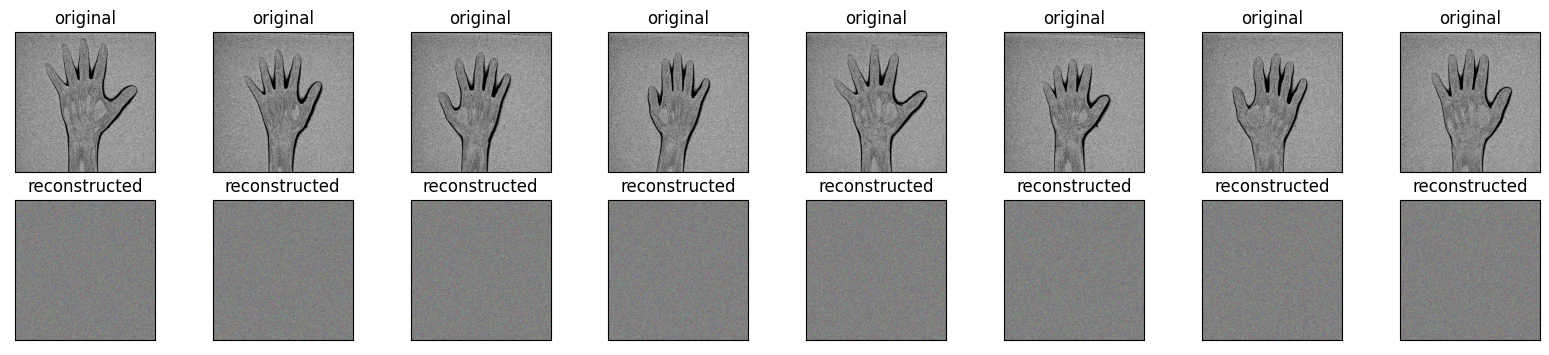

In [13]:
n = 8
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    img_origin = tf(b[i]*255)
    plt.imshow(img_origin)
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    img_pred = tf(r[0][i]*255)
    plt.imshow(img_pred)
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()